# **TASK 3: Exploratory Data Analysis - Retail**

Author: SATABDI MISHRA 

Date: 17/07/2021

Dataset: SampleSuperstore.csv

## Import Libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


## Read the data

In [2]:
superstore = pd.read_csv("SampleSuperstore.csv")

superstore.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Data Summary


**Get Data Info**

Observations:
> 1. No null values.
> 2. There are 13 columns
> 3. Shape of the data is (9994,13)

In [3]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


Get the data types of each column

In [4]:
superstore.dtypes

Ship Mode        object
Segment          object
Country          object
City             object
State            object
Postal Code       int64
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [5]:
# Convert Postal Code to type object

superstore['Postal Code'] = superstore['Postal Code'].astype('object')

Using the isnull().sum() function we can verify once again that there are no null values in the dataset

In [6]:
superstore.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

Checking for duplicates

In [7]:
superstore.duplicated().sum()

17

In [8]:
# Remove duplicates 
superstore.drop_duplicates(inplace=True)

superstore.duplicated().sum()

0

Descriptive Statistics of Continuous Variables

In [9]:
superstore.describe()

,Sales,Quantity,Discount,Profit
count,9977.000000,9977.000000,9977.000000,9977.00000
mean,230.148902,3.790719,0.156278,28.69013
std,623.721409,2.226657,0.206455,234.45784
min,0.444000,1.000000,0.000000,-6599.97800
25%,17.300000,2.000000,0.000000,1.72620
50%,54.816000,3.000000,0.200000,8.67100
75%,209.970000,5.000000,0.200000,29.37200
max,22638.480000,14.000000,0.800000,8399.97600


Count of unique values 

In [10]:
superstore.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

**Analysis of hierarchical levels of categorical variables**:
> 1. Based on Product: *Category, Sub Category*
> 2. Based on Geography: *Country, Region, State, City, Postal Code*
> 3. Segment
> 4. Shipmode 

**Segment & Product Grouping**

Observations:

> 1. Levels of Product in order: *Category* -> *Sub Category*.
> 2. There are 3 unique segments - *Consumer, Corporate & Home Office*.
> 3. There are 3 unique product category - *Furniture, Office Supplies & Technology*
> 4. Each Segment delivers all the available Sub Category of products.


In [11]:
# Analyse Segment & Product grouping

superstore[['Segment','Category','Sub-Category']].groupby(['Segment','Category']).nunique()

Sub-Category
Segment     Category                     
Consumer    Furniture                   4
            Office Supplies             9
            Technology                  4
Corporate   Furniture                   4
            Office Supplies             9
            Technology                  4
Home Office Furniture                   4
            Office Supplies             9
            Technology                  4

In [12]:
# Analyse the hierarchical levels of product

superstore[['Category','Sub-Category']].groupby(['Category', 'Sub-Category']).size()

Category         Sub-Category
Furniture        Bookcases        228
                 Chairs           615
                 Furnishings      956
                 Tables           319
Office Supplies  Appliances       466
                 Art              795
                 Binders         1522
                 Envelopes        254
                 Fasteners        217
                 Labels           363
                 Paper           1359
                 Storage          846
                 Supplies         190
Technology       Accessories      775
                 Copiers           68
                 Machines         115
                 Phones           889
dtype: int64

**Geographical Location Level Grouping**

(Not representing City and Postal Code due to their high nunique values)

Observations:
> 1. It follows the order Country -> Region -> State -> City -> Postal Code.
> 2. Postal Code is the lowest level and Country is the highest.
> 3. California has the highest number of records, Wyoming the lowest.

In [13]:
superstore[['Country','Region','State']].value_counts()

Country        Region   State               
United States  West     California              1996
               East     New York                1127
               Central  Texas                    983
               East     Pennsylvania             586
               West     Washington               502
               Central  Illinois                 491
               East     Ohio                     468
               South    Florida                  383
               Central  Michigan                 254
               South    North Carolina           249
               West     Arizona                  224
               South    Virginia                 224
                        Georgia                  184
                        Tennessee                183
               West     Colorado                 182
               Central  Indiana                  149
               South    Kentucky                 139
               East     Massachusetts            135
 

In [14]:
## Remove unnecessary columns - Postal Code and City

superstore.drop(columns=['Postal Code','City'], inplace = True)

**Ship Mode unique values**

Observations:
> 1. There are 4 unique types of Ship Mode.
> 2. Standard Class has the highest number of records.
> 3. Same day has the lowest, which is expected since same day delivery is generally more expensive.

In [15]:
superstore['Ship Mode'].value_counts()

Standard Class    5955
Second Class      1943
First Class       1537
Same Day           542
Name: Ship Mode, dtype: int64

**Unique Discounts offered**

In [16]:
superstore['Discount'].value_counts()

0.00    4787
0.20    3653
0.70     418
0.80     299
0.30     226
0.40     206
0.60     138
0.10      94
0.50      66
0.15      52
0.32      27
0.45      11
Name: Discount, dtype: int64

So we can conclude each record in the data is at Sub-Category, Segment, Ship Mode, Postal Code & Discount Level.

i.e. Each row represents Sales, Profit, and Quantity of a retail product at a given segment, sub-category, shipment mode,postal code and discount.

## Data Visualization

**Plotting Correlation Matrix**

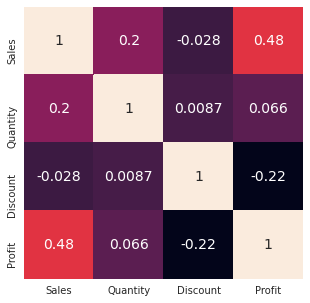

In [17]:
plt.figure(figsize=(5,5))
sns.heatmap(superstore.corr(), annot=True, cbar=False, annot_kws={'size':14})
plt.show()


**Summary of Sales - Plotting Distribution of Profit, Loss and No-Profit**

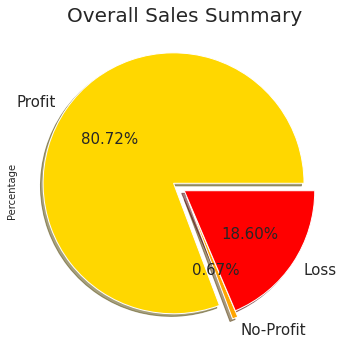

In [18]:
# Plotting Distribution of Profit, Loss and No-Profit

colors = ['gold','orange','red']

summary = pd.DataFrame({'Profit':superstore.Quantity[superstore.Profit > 0].sum(), 
                        'No-Profit':superstore.Quantity[superstore.Profit == 0].sum(), 
                        'Loss':superstore.Quantity[(superstore.Profit) < 0].sum()},
                       index={'Count'}).T

plt.title('Overall Sales Summary', fontsize=20)
summary.Count.plot.pie(autopct='%1.2f%%',figsize=(6,6), label='Percentage', colors = colors, 
                       textprops = {"fontsize":15}, shadow=True, explode=(0.1,0.05,0))
plt.show()


**Distribution of Profit based on the categories: Shipmode, Segment and Region.**

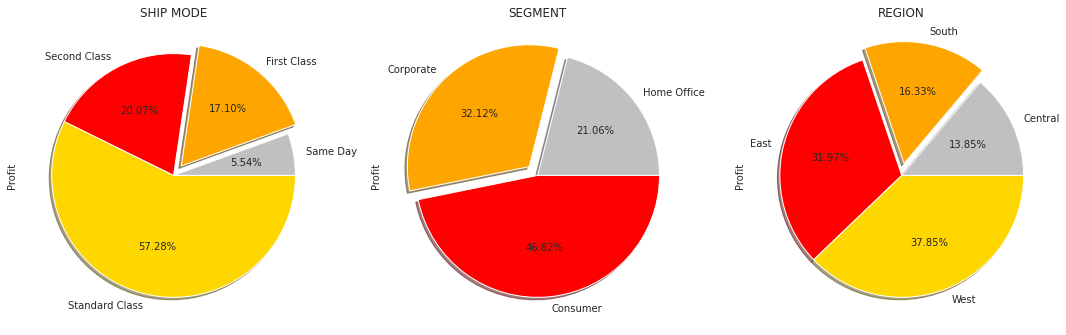

In [19]:
# Plotting Shipmode, Segment, and Region-wise profit

colors = ['silver','orange','red', 'gold']
explode_ship = (0, 0.1, 0, 0)
explode_region = (0, 0.1, 0, 0)
explode_segment = (0,0.1,0)

profit_ship = pd.DataFrame(superstore.groupby('Ship Mode').sum()).sort_values('Profit')
profit_segment = pd.DataFrame(superstore.groupby('Segment').sum()).sort_values('Profit')
profit_region = pd.DataFrame(superstore.groupby('Region').sum()).sort_values('Profit')

fig, ax = plt.subplots(1,3, figsize=(15,6))
ax[0].set_title('SHIP MODE', fontsize=12)
ax[1].set_title('SEGMENT', fontsize=12)
ax[2].set_title('REGION', fontsize=12)

profit_ship.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":10}, shadow=True,\
                            explode=explode_ship,colors=colors, ax=ax[0])
profit_segment.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":10}, shadow=True,\
                               explode=explode_segment,colors=colors, ax=ax[1])
profit_region.Profit.plot.pie(autopct='%1.2f%%', textprops = {"fontsize":10}, shadow=True,\
                              explode=explode_region, colors=colors, ax=ax[2])

plt.tight_layout()

plt.show()

**Plot Regionwise Losses**

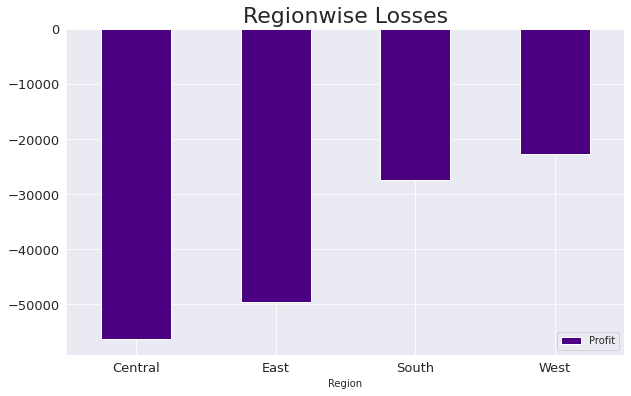

In [20]:
#Plot regionwise losses
#Here we are only taking records where profit<0.

regionwise_data = superstore[superstore.Profit<0][['Region','Profit']].groupby(['Region']).sum().sort_values('Profit')

color=['indigo']

ax = regionwise_data.plot(kind='bar', figsize=(10,6), color=color, fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Regionwise Losses", fontsize=22)
plt.xticks(rotation = 0)
plt.show()


**Statewise Sales and Profit**

In [21]:
statewise_data = superstore[['Region','State','Sales','Profit']].groupby(['Region','State']).sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


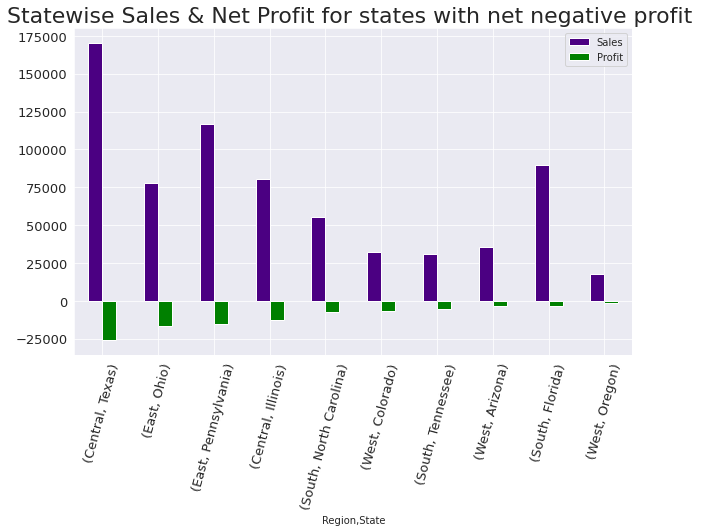

In [22]:
# Plot states with net negative profit

color=['indigo','green']

state_losses = statewise_data.sort_values('Profit')[statewise_data.Profit<0]
ax = state_losses.plot(kind='bar', figsize=(10,6), color=color, fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Statewise Sales & Net Profit for states with net negative profit ", fontsize=22)
plt.xticks(rotation = 75)
plt.show()


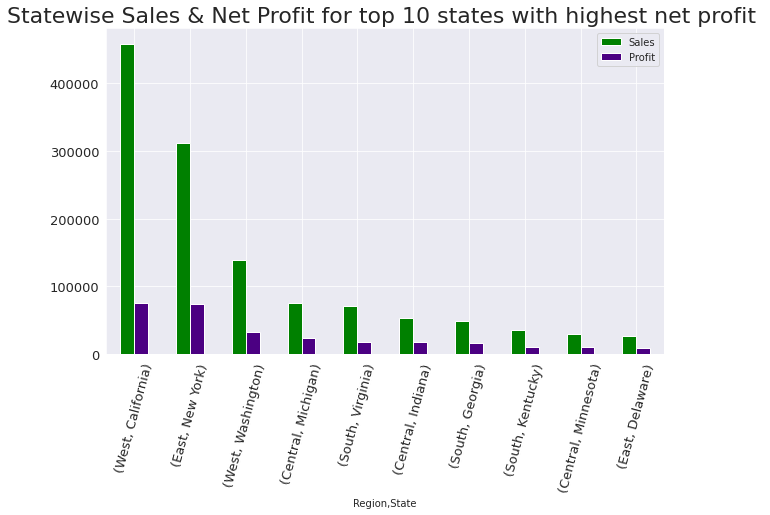

In [23]:
# Plot top 10 states with highest profit

color=['green','indigo']

state_top10_profit = statewise_data.sort_values('Profit', ascending = False)[:10]
ax = state_top10_profit.plot(kind='bar', figsize=(10,6), color=color, fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Statewise Sales & Net Profit for top 10 states with highest net profit ", fontsize=22)
plt.xticks(rotation = 75)
plt.show()


**Plotting Category & Sub Catergory-wise  Sales and Profit**

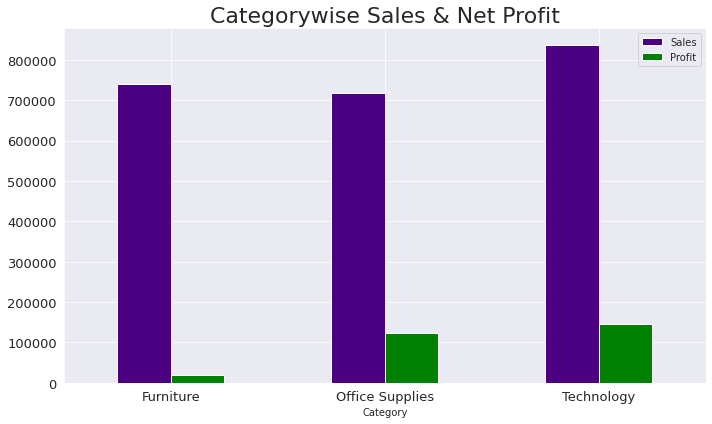

In [24]:
#Plotting categorywise Sales and Profit
color = ['indigo','green']

categorywise_data = superstore[['Category','Sales','Profit']].groupby(['Category']).sum().sort_values('Profit')

ax = categorywise_data.plot(kind='bar', figsize=(10,6), color=color, fontsize=13)

ax.set_alpha(0.8)
ax.set_title("Categorywise Sales & Net Profit", fontsize=22)
plt.xticks(rotation = 0)
plt.tight_layout()
plt.show()


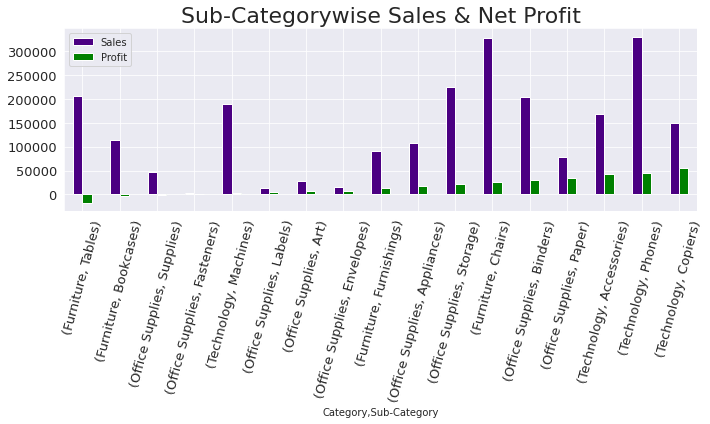

In [25]:
#Plotting sub-categorywise Sales and Profit

subcategorywise_data = superstore[['Category','Sub-Category','Sales','Profit']].groupby(['Category','Sub-Category']).sum().sort_values('Profit')

ax = subcategorywise_data.plot(kind='bar', figsize=(10,6), color=color, fontsize=13)
ax.set_alpha(0.8)
ax.set_title("Sub-Categorywise Sales & Net Profit", fontsize=22)
plt.xticks(rotation=75)

plt.tight_layout()
plt.show()

**Plot category, statewise losses for top 10 combinations**

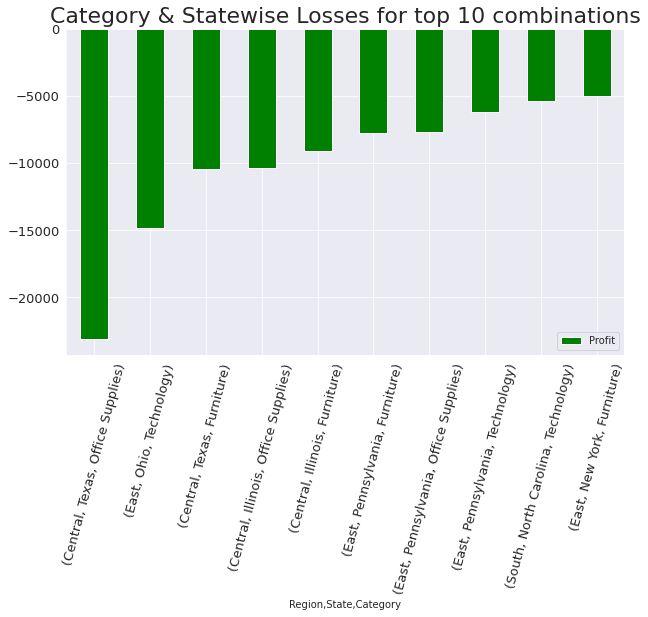

In [26]:
#Plot category, statewise losses for top 10 states,category combinations
#Here we are only interested in losses suffered, i.e. we will only consider records where profit<0.

statewisewise_data = superstore[superstore.Profit<0][['Region','State','Category','Profit']].groupby(['Region','State','Category']).sum().sort_values('Profit')[:10]

color=['green']

ax = statewisewise_data.plot(kind='bar', figsize=(10,6), color=color, fontsize=13);
ax.set_alpha(0.8)
ax.set_title("Category & Statewise Losses for top 10 combinations", fontsize=22)
plt.xticks(rotation = 75)
plt.show()


**Plotting effect of Discount,Quantity on Profit**



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


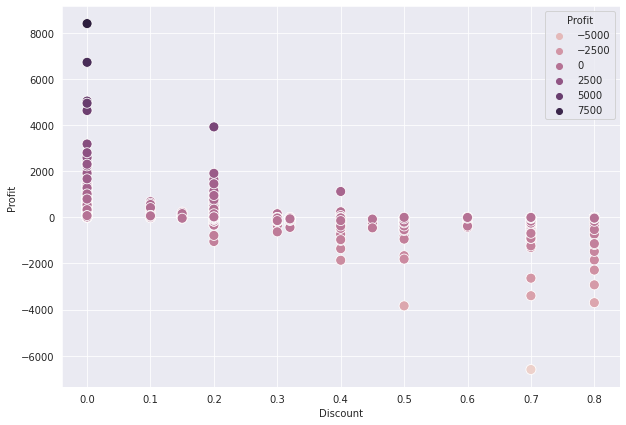

In [27]:
#Plotting effect of Discount on Profit 
plt.figure(figsize=(10,7))
sns.scatterplot(superstore.Discount, superstore.Profit, hue=superstore.Profit, s=100)
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


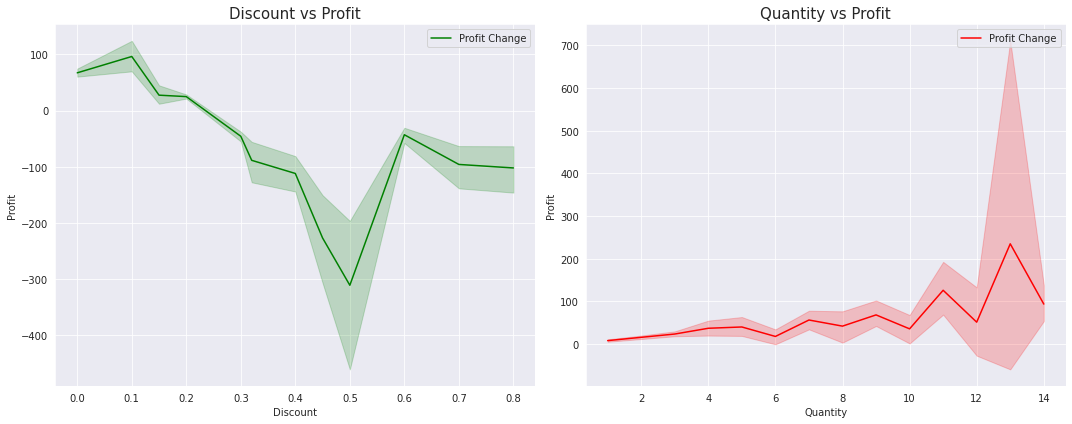

In [28]:
# Analysis on Discount, Quantity & Profit
fig, ax = plt.subplots(1,2, figsize=(15,6))
ax[0].set_title('Discount vs Profit', fontsize=15)
ax[1].set_title('Quantity vs Profit', fontsize=15)

sns.lineplot(superstore.Discount, superstore.Profit, color='green', label='Profit Change', ax=ax[0])
sns.lineplot(superstore.Quantity, superstore.Profit, color='red', label='Profit Change', ax=ax[1])

plt.tight_layout()
plt.show()


## KEY FINDINGS

> 1. We are seeing high profits with 0 or low discounts, and losses increases with increase in discount.
> 2. Number of products sold increases with increase in discount.
> 3. Furniture is suffering heavy losses due to Chairs and Bookcases.
> 4. Technology items such as Copiers, Phones & Accessories are having maximum profits.
> 4. Central Region is suffering most losses esp. in states like Texas & Illinois.
> 5. Eastern Region with net high profit is suffering heavy losses due to furniture.
> 5. Western & Eastern Region are having maximum profits esp. in states like California, New York, Washington. 

## RECOMMENDED SOLUTIONS

1. Reduce supply of furnitures & Office Supplies esp. Chairs, Supplies and Bookcases in the affected states.
2. Keep discounts low. 